## Teoria Boosting

Gradient Boosting

O Bagging reduz a variância do modelo, porém não melhora sua capacidade, ainda mantendo um viés alto.

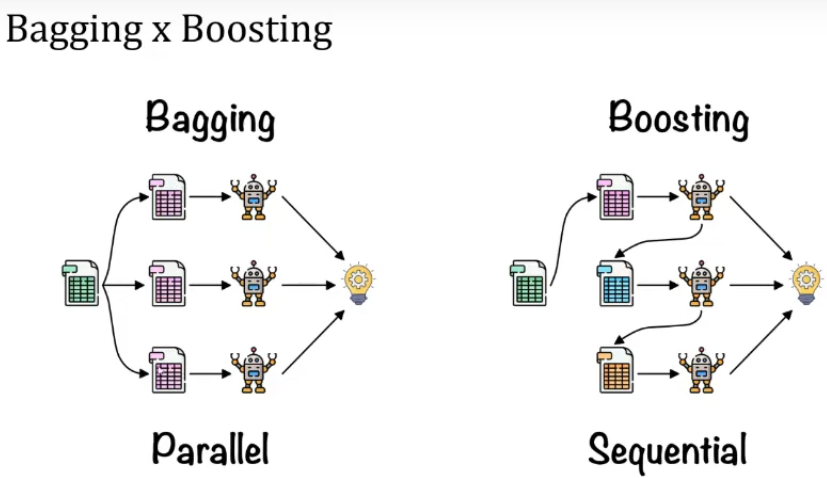

Weak Learners

É um modelo que possui performance levemente melhor que o chute aleatório.

vários Weak Learners podem ser utilizados para obter um modelo forte

Boosting

* Construir um modelo recursivamente

* A cada passo adicionar um modelo ruim

$$G_m(x) = G_{m-1}(x) + \alpha h_m(x)$$

Por que Weak Learners ?

* Maior Velocidade

* Ganho de Desempenho

* Menor chance de Overfitting

Boosting - Treinamento

Começar com chute inicial e a cada passo treina-se um modelo fraco

Chances (Odds):

$$\frac{p}{1 - p}$$

Sempre que o evento for menos provável, a chance estará entre [0,1]

Caso contrário $[1, +inf[$

Log (Odds):

Melhor visualização das chances.

$$log(\frac{p}{1-p})$$

Boosting - Classificação

Calcula-se o chute inicial pelo residual

$$Residual = Observado - Predito$$

Não pode-se somar o resultado com o chute inicial para um novo modelo

$$\frac{\sum{Residual_i}}{\sum{[Prob anterior_i \cdot (1 - Prob anterior_i)]}}$$

Visão Estatística: Boosting é uma maneira genérica de ter um modelo final baseado em vários modelos fracos, através de uma estratégia aditiva gulosa

Visão Otimização: Boosting é gradiente descente no espaço de funções

Gradientes:

Direção em que devemos mudar o parâmetro para maximizar algo

Boosting e Gradientes:

A derivada do erro quadrático médio é o próprio

O boosting pode ser visto como uma otimização de gradiente.

XGBoost

Extreme Gradient Boosting é uma implementação popular aplicado em árvores de decisão

Boa escolha como modelo complexo para dados tabulares

XGBoost - Modificações

* Aproximação de taylor de segunda ordem ao invés de derivada/residual

* Feature Sampling

* Row Sampling

XGBoost - Hiperparâmetros

* Quanto maior a quantidade de modelos totais, mais poder de modelagem e mais tendência a overfitting

* Learning Rate: Quanto menor, maior o tempo para convergir

XGBoost - Características

* Vantagens:

Aplcável a diversas tarefas e muito escalonável

* Desvantagens:

Não muito interpretável, derivação matemática complexa

## Implementação Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dic = {'sqfeet': [750,800,850,900,950],
      'rent':[1160,1200,1280,1450,2000]}

df = pd.DataFrame(data = dic)

df.head()

,sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,2000


In [3]:
rent_mean = df.mean()[1]
F0 = [rent_mean for i in range(5)]
df['F0'] = F0
df.head()

,sqfeet,rent,F0
0,750,1160,1418.0
1,800,1200,1418.0
2,850,1280,1418.0
3,900,1450,1418.0
4,950,2000,1418.0


Text(0, 0.5, 'Rent(y)')

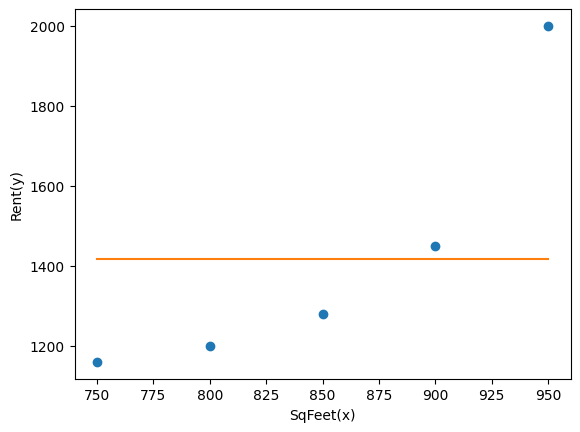

In [4]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F0'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Vemos que o chute inicial não é horrível mas também não passa perto da maioria dos valores. 

A distância entre nosso chute e o valor real, podemos chamar de residual, e é exatamente ela que nosso aprendiz fraco irá prever.

In [5]:
residual = df['rent']-df['F0']
df['y-F0'] = residual
df.head()

,sqfeet,rent,F0,y-F0
0,750,1160,1418.0,-258.0
1,800,1200,1418.0,-218.0
2,850,1280,1418.0,-138.0
3,900,1450,1418.0,32.0
4,950,2000,1418.0,582.0


Text(0, 0.5, 'y-F0')

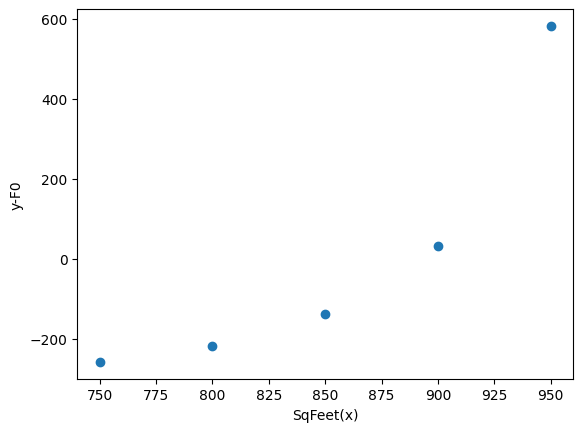

In [6]:
plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

Para treinar o modelo vou usar a mesma entrada Sqfett, entretanto a saída será considerada y-F0. Ou seja, nosso modelo aprende a prever o erro do passo anterior de certa maneira.

In [7]:
from sklearn.tree import DecisionTreeRegressor

regressor1 = DecisionTreeRegressor(max_depth = 1)

regressor1.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F0'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(max_depth=1)

Text(0, 0.5, 'y-F0')

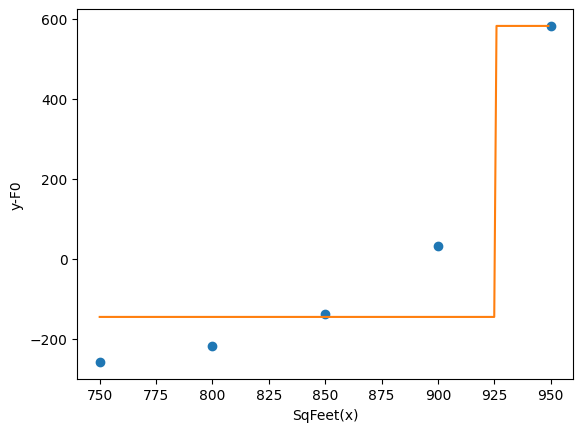

In [8]:
plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor1.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

Podemos obter F1 somando os dois modelos.

In [9]:
F1 = df['F0']+regressor1.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F1'] = F1
df.head()

,sqfeet,rent,F0,y-F0,F1
0,750,1160,1418.0,-258.0,1272.5
1,800,1200,1418.0,-218.0,1272.5
2,850,1280,1418.0,-138.0,1272.5
3,900,1450,1418.0,32.0,1272.5
4,950,2000,1418.0,582.0,2000.0


Text(0, 0.5, 'Rent(y)')

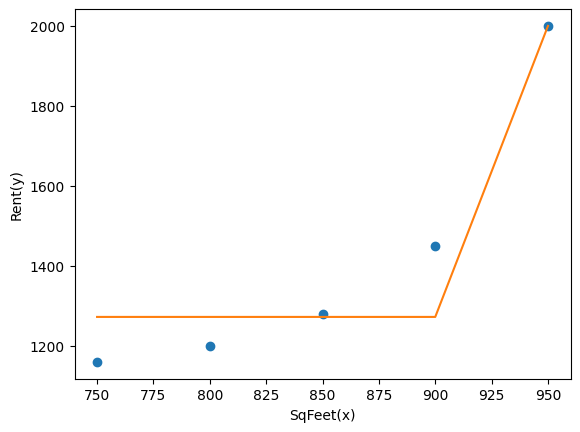

In [10]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F1'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Agora podemos repetir o mesmo procedimento - calcular o residual de F1 e treinar um modelo para prever este residual.

In [11]:
residual = df['rent']-df['F1']
df['y-F1'] = residual
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1
0,750,1160,1418.0,-258.0,1272.5,-112.5
1,800,1200,1418.0,-218.0,1272.5,-72.5
2,850,1280,1418.0,-138.0,1272.5,7.5
3,900,1450,1418.0,32.0,1272.5,177.5
4,950,2000,1418.0,582.0,2000.0,0.0


Text(0, 0.5, 'y-F1')

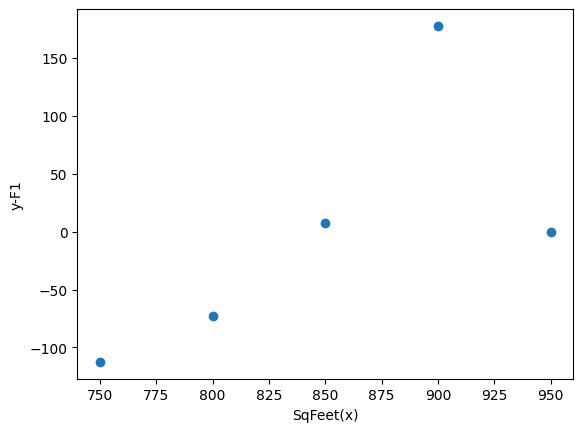

In [12]:
plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

In [14]:
regressor2 = DecisionTreeRegressor(max_depth = 1)

regressor2.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F1'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(max_depth=1)

Text(0, 0.5, 'y-F1')

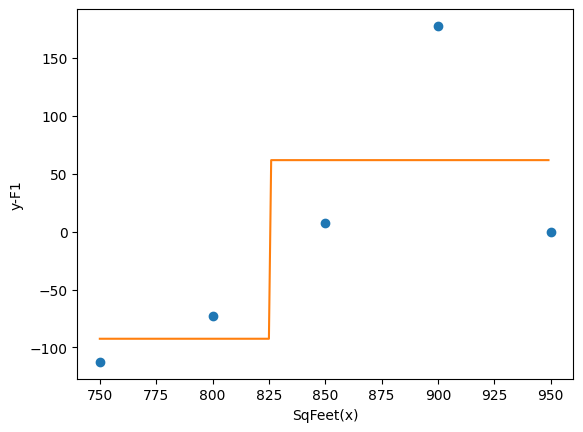

In [15]:
plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

In [16]:
F2 = df['F1']+regressor2.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F2'] = F2
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667


Text(0, 0.5, 'Rent(y)')

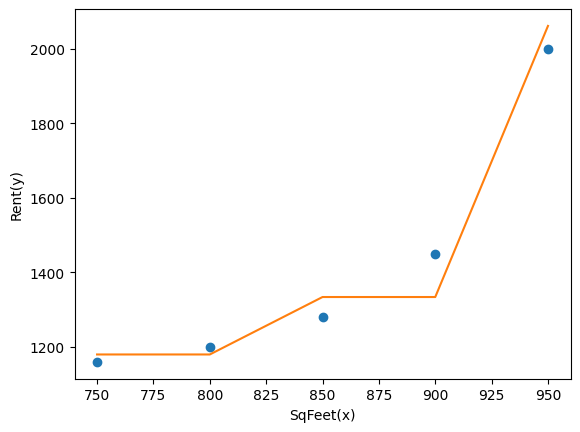

In [17]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F2'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

In [18]:
residual = df['rent']-df['F2']
df['y-F2'] = residual
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2,y-F2
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000,-20.000000
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000,20.000000
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667,-54.166667
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667,115.833333
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667,-61.666667


Text(0, 0.5, 'y-F2')

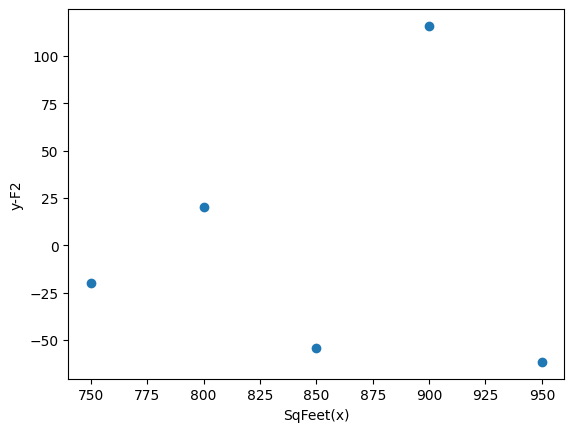

In [19]:
plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

In [20]:
regressor3 = DecisionTreeRegressor(max_depth = 1)

regressor3.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F2'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(max_depth=1)

Text(0, 0.5, 'y-F2')

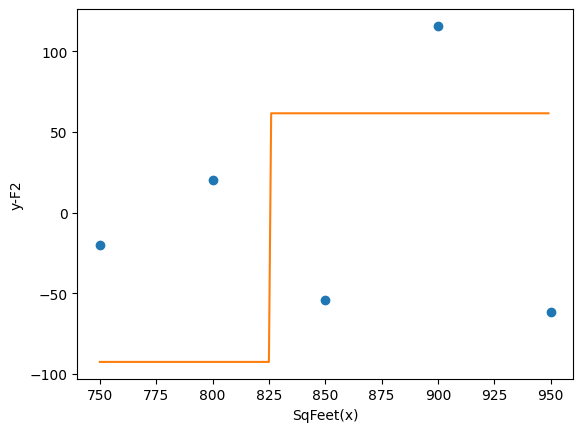

In [21]:
plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

In [22]:
F3 = df['F2']+regressor3.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F3'] = F3

Text(0, 0.5, 'Rent(y)')

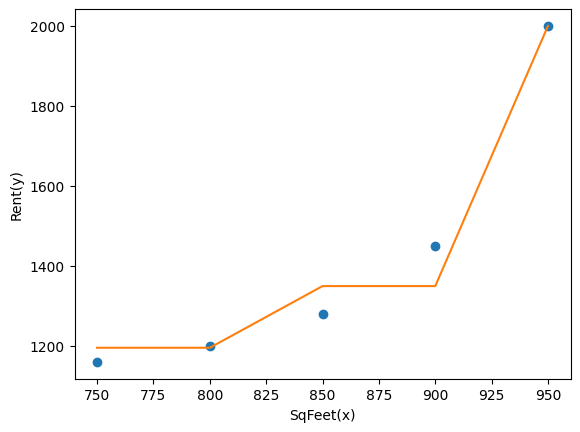

In [23]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F3'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Text(0, 0.5, 'Rent(y)')

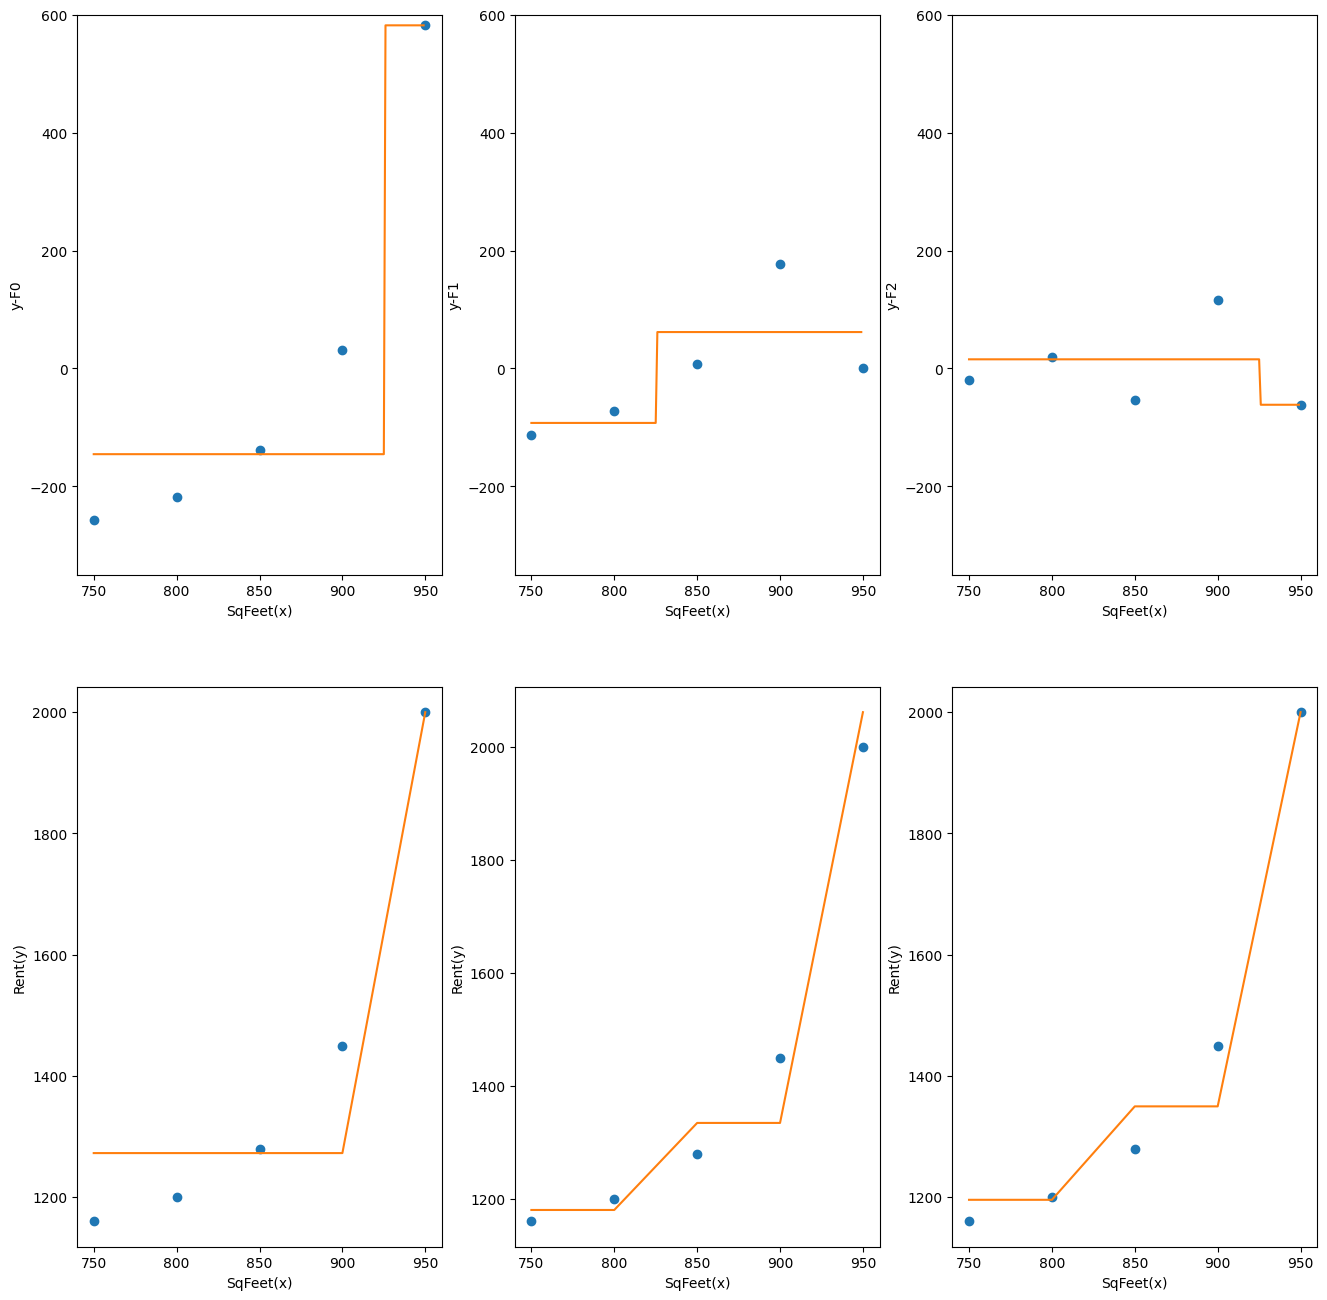

In [24]:
plt.figure(figsize=(16,16))


plt.subplot(2,3,1)

plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor1.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

plt.subplot(2,3,2)

plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

plt.subplot(2,3,3)

plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor3.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

plt.subplot(2,3,4)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F1'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

plt.subplot(2,3,5)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F2'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

plt.subplot(2,3,6)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F3'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

In [25]:
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2,y-F2,F3
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000,-20.000000,1195.416667
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000,20.000000,1195.416667
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667,-54.166667,1349.583333
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667,115.833333,1349.583333
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667,-61.666667,2000.000000
